# Timeline des types de Commentaires
=> ATTENTION LA TIMELINE EST DIFFERENTE ENTRE LE TRS ET LA VIDEO
- Première mi-temps TRS "0.000" => Vidéo "00:11:52.4"
- Deuxième mi-temps TRS "3257.608" => Vidéo "00:57:22.70"

In [170]:
import pandas as pd
from numpy import arange
import codecs

In [171]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [172]:
import pickle

In [197]:
commentairesName="/Users/gilles/Copy/Recherche/Rugby/Videos/CorrespondancesAction-PlayVsColourVsSupportaire.csv"
commentairesTypesName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/Timeline-TypeCommentaires2.pkl"
commentaireActionName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/Timeline-CommentaireAction2.pkl"
commentairesFile=codecs.open(commentairesName,"r",encoding="utf8")
commentaires=commentairesFile.readlines()

In [214]:
finMT1=273300
debutMT2=324500

In [174]:
initialTime="00:11:52.4"
decalage=0
def decodeTime(temps):
    (heure,minute,seconde)=temps.split(":")
    result=int(100*(3600*int(heure)+60*int(minute)+float(seconde))-decalage)
    return result

decalage=decodeTime(initialTime)
print decalage, decodeTime(initialTime)

71240 0


In [175]:
timeMT1="00:11:52.40"
timeMT2="00:57:22.70"
debutMT2=325760.8
decalage1=0
decalage2=600000
def decodeTime(temps):
    (heure,minute,seconde)=temps.split(":")
    timeCode=int(100*(3600*int(heure)+60*int(minute)+float(seconde))-decalage1)
    if timeCode>=decalage2:
        timeCode=timeCode-decalage2+int(debutMT2)
    return timeCode

decalage1=decodeTime(timeMT1)
decalage2=decodeTime(timeMT2)
print decalage1, decodeTime(timeMT1)
print decalage2, decodeTime(timeMT2)

71240 0
273030 325760


In [176]:
def sliceDataFrame(df,debut,fin,seuil,colonnes):
    return df[df.index<fin][df[df.index<fin].index>=debut][colonnes].dropna(thresh=seuil)

In [177]:
#timeLine=pd.DataFrame(index=[float(i)/100 for i in range(6500000)],columns=["début","fin","V1","V2","V3"])
timeLine=pd.DataFrame(columns=["début","fin","numEvent","événement","numAct","action","numSpk","Spk","texte","PxP","colour","support"])

In [178]:
for ligne in commentaires[1:]:
    elements=ligne.strip().split(";")
    if elements[14]=="":
        typeCommentaire=elements[13].lower()
    else:
        typeCommentaire=elements[14].lower()

    if typeCommentaire in ["play by play","ponctuant"]:
        boolPlay=1
        boolColour=np.nan
        boolSupport=np.nan
    elif typeCommentaire in ["colour commentary","color commentary"]:
        boolPlay=np.nan
        boolColour=1
        boolSupport=np.nan
    elif typeCommentaire in ["supportaire"]:
        boolPlay=np.nan
        boolColour=np.nan
        boolSupport=1
    elif typeCommentaire=="":
        boolPlay=np.nan
        boolColour=np.nan
        boolSupport=np.nan
    else:
        print "commentaire non-standard",typeCommentaire, ligne
    
    if " " in elements[5]:
        (numEvent,Event)=elements[5].split(" ",1)
        numEvent=int(numEvent)
    else:
        (numEvent,Event)=(np.nan,np.nan)
    if " " in elements[6]:
        (numAction,Action)=elements[6].split(" ",1)
        numAction=int(numAction.strip("A-"))
    else:
        (numAction,Action)=(np.nan,np.nan)
    if " " in elements[8]:
        (numSpk,texte)=elements[8].split(" ",1)
        if "-" in numSpk:
            (spk,numSpk)=numSpk.split("-",1)
            numSpk=int(numSpk)
        else:
            numSpk=np.nan
            spk=numSpk
    else:
        (numSpk,texte)=(np.nan,np.nan)

    timeLine.loc[decodeTime(elements[1])]=[decodeTime(elements[1]),decodeTime(elements[2]),numEvent,Event,numAction,Action, numSpk,spk,texte, boolPlay, boolColour, boolSupport]

In [179]:
timeLine[timeLine.index<3400].dropna(subset=["PxP"]).iloc[-1]["fin"]

3592.0

In [180]:
def trancheTemps(duree):
    tranches=[i*25 for i in range(1,40)]
    for tranche in tranches:
        if duree<=tranche:
            return tranche

In [181]:
trancheTemps(600)

600

In [182]:
timeLine["dureeS1"]=timeLine[(timeLine["Spk"]=="spk1") & (timeLine["texte"].dropna())].apply(lambda x: trancheTemps(x["fin"]-x["début"]),axis=1)
timeLine["dureeS2"]=timeLine[(timeLine["Spk"]=="spk2") & (timeLine["texte"].dropna())].apply(lambda x: trancheTemps(x["fin"]-x["début"]),axis=1)

In [183]:
for typeComm in ["PxP","colour"]:
    for duree in ["dureeS1","dureeS2"]:
        print typeComm,duree, int(timeLine[timeLine[typeComm]>0][duree].mean()), int(timeLine[timeLine[typeComm]>0][duree].std())

PxP dureeS1 169 76
PxP dureeS2 177 128
colour dureeS1 171 88
colour dureeS2 186 122


## Durées Spk1 en général

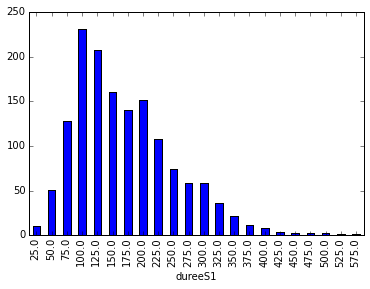

In [184]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS1=pd.pivot_table(timeLine[["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar")

## Durées Spk1 en général pour MT1

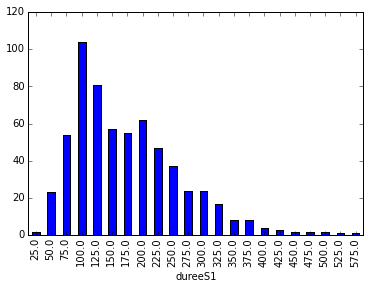

In [215]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS1=pd.pivot_table(timeLine[timeLine["début"]<finMT1][["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar")

## Durées Spk1 en général pour MT2

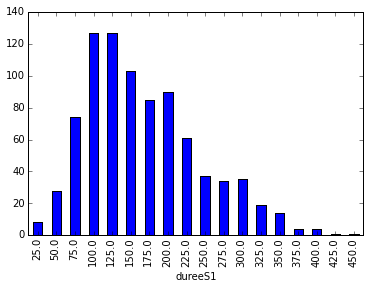

In [216]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS1=pd.pivot_table(timeLine[timeLine["début"]>debutMT2][["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar")

## Durées Spk1 dans le CC

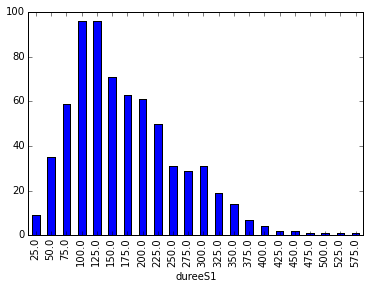

In [185]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS1=pd.pivot_table(timeLine[timeLine["colour"]>0][["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar")

## Durées Spk2 en général

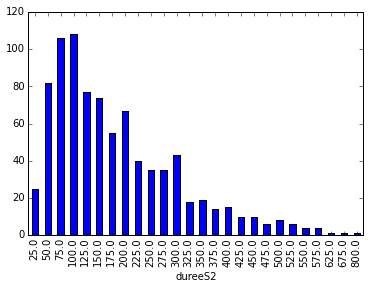

In [186]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS2=pd.pivot_table(timeLine[["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar")

## Durées Spk2 en général dans MT1

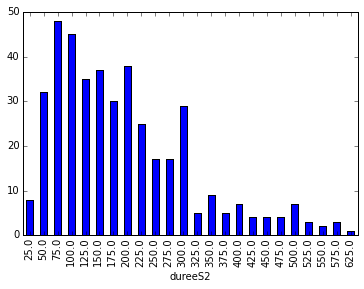

In [217]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS2=pd.pivot_table(timeLine[timeLine["début"]<finMT1][["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar")

## Durées Spk2 en général dans MT2

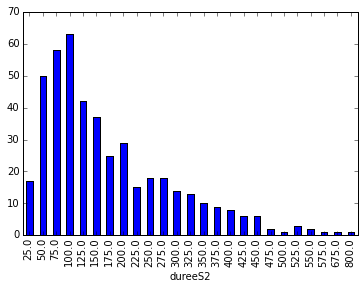

In [218]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS2=pd.pivot_table(timeLine[timeLine["début"]>debutMT2][["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar")

## Durées Spk2 dans le CC

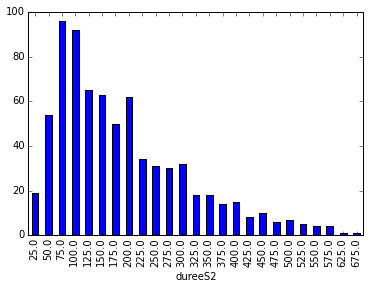

In [207]:
#timeLine[timeLine["numAction"].notnull()]["textAction"]=timeLine["action"].str.split(" ").str[1:]
tableS2=pd.pivot_table(timeLine[timeLine["colour"]>0][["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar")

In [188]:
#sliceDataFrame(timeLine,3200,3300,1,["colour"])

In [189]:
%%time
timeCommentType=pd.DataFrame(columns=["PxP","colour","support","sumPxP","sumColour","sumSupport"])
step=100
for i in arange(3000,644000,step):
    if len(sliceDataFrame(timeLine,i,i+step,1,["PxP"])) > 0:
        PxP=1
        sumPxP=sliceDataFrame(timeLine,i,i+step,1,["PxP"])["PxP"].sum()
    else:
        PxP=0
        sumPxP=0
    if len(timeLine[timeLine.index<i].dropna(subset=["PxP"]))>0:
        if timeLine[timeLine.index<i].dropna(subset=["PxP"]).iloc[-1]["fin"]>i:
            PxP=1
            sumPxP+=1
    if len(sliceDataFrame(timeLine,i,i+step,1,["colour"])) > 0:
        colour=1
        sumColour=sliceDataFrame(timeLine,i,i+step,1,["colour"])["colour"].sum()
    else:
        colour=0
        sumColour=0
    if len(timeLine[timeLine.index<i].dropna(subset=["colour"]))>0:
        if timeLine[timeLine.index<i].dropna(subset=["colour"]).iloc[-1]["fin"]>i:
            colour=1
            sumColour+=1
    if len(sliceDataFrame(timeLine,i,i+step,1,["support"])) > 0:
        support=1
        sumSupport=sliceDataFrame(timeLine,i,i+step,1,["support"])["support"].sum()
    else:
        support=0
        sumSupport=0
    if len(timeLine[timeLine.index<i].dropna(subset=["support"]))>0:
        if timeLine[timeLine.index<i].dropna(subset=["support"]).iloc[-1]["fin"]>i:
            support=1
            sumSupport+=1
    timeCommentType.loc[i]=[PxP, colour, support, sumPxP, sumColour, sumSupport]

CPU times: user 1min 31s, sys: 225 ms, total: 1min 32s
Wall time: 1min 32s


In [228]:
#timeCommentType[0:5880][timeCommentType["sumPxP"]>1]
print "nbPxP", "Match",timeCommentType["PxP"].sum()
print "nbPxP", "MT1",timeCommentType[timeCommentType.index<finMT1]["PxP"].sum()
print "nbPxP", "MT2",timeCommentType[timeCommentType.index>debutMT2]["PxP"].sum()
print "nbColour", "Match",timeCommentType["colour"].sum()
print "nbColour", "MT1",timeCommentType[timeCommentType.index<finMT1]["colour"].sum()
print "nbColour", "MT2",timeCommentType[timeCommentType.index>debutMT2]["colour"].sum()

nbPxP Match 2006.0
nbPxP MT1 1099.0
nbPxP MT2 907.0
nbColour Match 3362.0
nbColour MT1 1395.0
nbColour MT2 1967.0


In [234]:
#timeCommentType[0:5880][timeCommentType["sumPxP"]>1]
print "nbActions", "Match",timeLine["numAct"].count()
print "nbActions", "MT1",timeLine[timeLine.index<finMT1]["numAct"].count()
print "nbActions", "MT2",timeLine[timeLine.index>debutMT2]["numAct"].count()
#print "nbActionsCommentées", "Match",timeLine[timeLine["Spk"].notnull()]["numAct"].count()

nbActions Match 1782
nbActions MT1 850
nbActions MT2 932
nbActionsCommentées Match 1766


In [235]:
#print "nbActionsCommentées", "MT1",timeLine[(timeLine.index<finMT1)&(timeLine["Spk"].notnull())]["numAct"].count()
#print "nbActionsCommentées", "MT2",timeLine[timeLine.index>debutMT2]["numAct"].count()
#print "nbActionsSansCommentaire", "Match",timeLine["numAct"].count()
#print "nbActionsSansCommentaire", "MT1",timeLine[timeLine.index<finMT1]["numAct"].count()
#print "nbActionsSansCommentaire", "MT2",timeLine[timeLine.index>debutMT2]["numAct"].count()

nbActionsCommentées MT1 848
nbActionsCommentées MT2 932
nbActionsSansCommentaire Match 1782
nbActionsSansCommentaire MT1 850
nbActionsSansCommentaire MT2 932


In [191]:
with codecs.open(commentairesTypesName,"wb") as output:
    pickle.dump(timeCommentType, output, pickle.HIGHEST_PROTOCOL)

In [198]:
with codecs.open(commentaireActionName,"wb") as output:
#    pickle.dump(timeLine[["début","fin","numEvent","événement","numAct","action","numSpk","Spk","texte"]], output, pickle.HIGHEST_PROTOCOL)
    pickle.dump(timeLine, output, pickle.HIGHEST_PROTOCOL)

In [199]:
timeLine

,début,fin,numEvent,événement,numAct,action,numSpk,Spk,texte,PxP,colour,support,dureeS1,dureeS2
3220,3220,3592,NaN,NaN,NaN,NaN,1,spk1,après avoir demandé si tout le monde était pr...,1,NaN,NaN,375,NaN
3254,3254,3690,1,coup d'envoi,1,grand coup de pied,NaN,spk1,NaN,NaN,NaN,NaN,NaN,NaN
3616,3616,3852,NaN,NaN,NaN,NaN,2,spk1,est donné par David Skrela,1,NaN,NaN,250,NaN
3694,3694,3738,1,coup d'envoi,2,réception,NaN,spk1,NaN,NaN,NaN,NaN,NaN,NaN
3806,3806,4042,2,regroupement,3,regroupement,NaN,spk1,NaN,NaN,NaN,NaN,NaN,NaN
3960,3960,4100,NaN,NaN,NaN,NaN,1,spk2,allez de suite dans le camp euh,1,NaN,NaN,NaN,150
4042,4042,4070,2,regroupement,4,extraction,NaN,spk2,NaN,NaN,NaN,NaN,NaN,NaN
4070,4070,4146,3,porté,5,porté,NaN,spk2,NaN,NaN,NaN,NaN,NaN,NaN
4146,4146,4214,4,regroupement,6,plaquage,NaN,spk2,NaN,NaN,NaN,NaN,NaN,NaN
4160,4160,4216,NaN,NaN,NaN,NaN,2,spk2,argentin,1,NaN,NaN,NaN,75
